# Análise, Saneamento e Visualização de Dados

Antes de realizar qualquer tarefa de Aprendizado de Máquina, é importante _olhar_ para os dados e entender qual a _cara_ deles. A partir disso, podemos entender melhor o problema e como abordar o tratamento da base, incluindo o seu saneamento.

Para mostrar isso, vamos utilizar um conjunto de dados de discentes da UFRN. Os dados foram coletados a partir da API de dados da UFRN. Os dados se referem a todos os alunos que ingressaram na UFRN até o ano de 2020.

## Importar os pacotes e dados necessários

In [1]:
# utilizar os Dataframes do Pandas para manipular as instâncias
import pandas as pd
# matplotlib para visualizar
import matplotlib.pyplot as plt
# gdown para baixar os dados
import gdown
plt.style.use('ggplot')

Vamos baixar os dados diretamente a partir do link abaixo.

In [2]:
url = 'https://drive.google.com/file/d/1dHJf2Sj9GuYm9VWaA1icBhd2F6i9PIcG/view?usp=sharing'
output = 'discentes.csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1dHJf2Sj9GuYm9VWaA1icBhd2F6i9PIcG
To: /content/discentes.csv
100%|██████████| 69.5M/69.5M [00:00<00:00, 82.6MB/s]


'discentes.csv'

In [3]:
data = pd.read_csv('discentes.csv', sep=';', parse_dates=True)

# Análise dos Dados

Vamos visualizar as primeias linhas para entender o formato de cada uma das características (_features_).

In [4]:
data.head()

,id_discente,sexo,ano_nascimento,raca,estado_origem,cidade_origem,estado,municipio,bairro,nivel_ensino,forma_ingresso,ano_ingresso,periodo_ingresso,cotista
0,0e356f33d9f25c70bd7b98ef1bd1ecd4,M,1943.0,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,NEOPOLIS,GRADUAÇÃO,VESTIBULAR,1969,1.0,f
1,a3f7753971d7ca9c1648616b1f7e4c48,M,1949.0,Não Informado,Rio de Janeiro,NaN,NaN,NaN,NaN,GRADUAÇÃO,VESTIBULAR,1970,1.0,f
2,d29e0a56e3cc973750e2d2cbabedc449,F,1947.0,Não Informado,NaN,NaN,NaN,NaN,NaN,GRADUAÇÃO,VESTIBULAR,1970,1.0,f
3,d4f89fe5c6dd43692b3c1fc4ce324fd5,M,1949.0,Não Informado,Rio Grande do Norte,NaN,NaN,NaN,NaN,GRADUAÇÃO,VESTIBULAR,1970,1.0,f
4,e2f244371122aea4140427ada6f391b4,M,1944.0,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,ALECRIM,GRADUAÇÃO,VESTIBULAR,1970,1.0,f


Além disso, é importante entender o tipo em que os dados estão caracterizados.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401711 entries, 0 to 401710
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_discente       401711 non-null  object 
 1   sexo              401711 non-null  object 
 2   ano_nascimento    400969 non-null  float64
 3   raca              401591 non-null  object 
 4   estado_origem     378367 non-null  object 
 5   cidade_origem     360549 non-null  object 
 6   estado            360160 non-null  object 
 7   municipio         360160 non-null  object 
 8   bairro            339771 non-null  object 
 9   nivel_ensino      401711 non-null  object 
 10  forma_ingresso    392619 non-null  object 
 11  ano_ingresso      401711 non-null  int64  
 12  periodo_ingresso  401177 non-null  float64
 13  cotista           401711 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 42.9+ MB


Já podemos buscar entender como os dados numéricos estão distribuídos a partir de estatísticas básicas fornecidas pelo `pandas`.

In [6]:
data.describe()

,ano_nascimento,ano_ingresso,periodo_ingresso
count,400969.000000,401711.000000,401177.000000
mean,1966.008243,2008.808176,1.422960
std,172.778685,10.442243,0.508853
min,1.000000,209.000000,0.000000
25%,1975.000000,2005.000000,1.000000
50%,1986.000000,2013.000000,1.000000
75%,1994.000000,2015.000000,2.000000
max,2071.000000,2020.000000,3.000000


Note que existem alguns dados _estranhos_, sobretudo para a _feature_ `ano_nascimento`. O menor valor existente na tabela é igual a 1 e o maior é 2071. Nenhum desses dois valores é possível realmente.

Esse comportamento pode ser melhor visualizado a partir de um _boxplot_.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


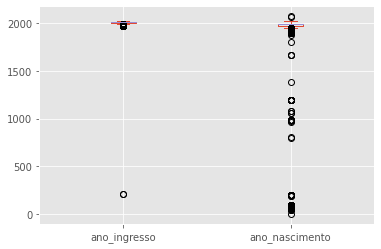

In [7]:
data[['ano_ingresso','ano_nascimento']].plot(kind='box')
plt.show()

Claramente, existem _outliers_ nos dados. Podemos fazer uma limpeza manual desses valores, mas vamos adotar alguns procedimentos básicos que, eventualmente, vão eliminar alguns desses problemas. 

O primeiro deles é descartar as entradas que possuem valores nulos em alguma de suas _features_.

In [8]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323589 entries, 0 to 401708
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_discente       323589 non-null  object 
 1   sexo              323589 non-null  object 
 2   ano_nascimento    323589 non-null  float64
 3   raca              323589 non-null  object 
 4   estado_origem     323589 non-null  object 
 5   cidade_origem     323589 non-null  object 
 6   estado            323589 non-null  object 
 7   municipio         323589 non-null  object 
 8   bairro            323589 non-null  object 
 9   nivel_ensino      323589 non-null  object 
 10  forma_ingresso    323589 non-null  object 
 11  ano_ingresso      323589 non-null  int64  
 12  periodo_ingresso  323589 non-null  float64
 13  cotista           323589 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 37.0+ MB


Com essa ação, o conjunto de dados reduziu de 401711 entradas para 323589.

Vamos verificar se existe entradas duplicadas nos dados. Veja que entradas duplicadas de nada ajudam e vão acabar prejudicando os algoritmos de aprendizado por provocar um viés desnecessário.

In [9]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323589 entries, 0 to 401708
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_discente       323589 non-null  object 
 1   sexo              323589 non-null  object 
 2   ano_nascimento    323589 non-null  float64
 3   raca              323589 non-null  object 
 4   estado_origem     323589 non-null  object 
 5   cidade_origem     323589 non-null  object 
 6   estado            323589 non-null  object 
 7   municipio         323589 non-null  object 
 8   bairro            323589 non-null  object 
 9   nivel_ensino      323589 non-null  object 
 10  forma_ingresso    323589 non-null  object 
 11  ano_ingresso      323589 non-null  int64  
 12  periodo_ingresso  323589 non-null  float64
 13  cotista           323589 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 37.0+ MB


O número de linhas da tabela não foi modificado, o que significa que não existiam entradas duplicadas nos dados. Isso era esperado, considerado que cada entrada representa uma matrícula de aluno na instituição.

Após esses procedimentos, vamos verificar como os dados ficaram distribuídos.

In [10]:
data.describe()

,ano_nascimento,ano_ingresso,periodo_ingresso
count,323589.000000,323589.000000,323589.000000
mean,1965.689918,2010.581290,1.431396
std,191.327737,7.926856,0.508522
min,48.000000,209.000000,0.000000
25%,1979.000000,2008.000000,1.000000
50%,1988.000000,2013.000000,1.000000
75%,1994.000000,2015.000000,2.000000
max,2018.000000,2020.000000,3.000000


Os valores mudaram, mas ainda existem inconsistências nos dados:

- o valor mínimo para o ano de nascimento é de 48
- o valor máximo para o ano de nascimento é de 2018
- o valor mínimo para o ano de ingresso é de 209

Esses valores não são possíveis. Então, precisamos fazer um filtro manual e retirar as entradas com valores inválidos.

Para fins deste exemplo, vamos adotar os seguintes critérios:

- `1850 < ano_nascimento < 2005`
- `1950 < ano_ingresso <= 2020`

In [11]:
data = data[(data['ano_ingresso'] > 1950) & (data['ano_ingresso'] <= 2020)]
data = data[(data['ano_nascimento'] > 1850) & (data['ano_nascimento'] < 2005)]
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319983 entries, 0 to 401708
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_discente       319983 non-null  object 
 1   sexo              319983 non-null  object 
 2   ano_nascimento    319983 non-null  float64
 3   raca              319983 non-null  object 
 4   estado_origem     319983 non-null  object 
 5   cidade_origem     319983 non-null  object 
 6   estado            319983 non-null  object 
 7   municipio         319983 non-null  object 
 8   bairro            319983 non-null  object 
 9   nivel_ensino      319983 non-null  object 
 10  forma_ingresso    319983 non-null  object 
 11  ano_ingresso      319983 non-null  int64  
 12  periodo_ingresso  319983 non-null  float64
 13  cotista           319983 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 36.6+ MB


,ano_nascimento,ano_ingresso,periodo_ingresso
count,319983.000000,319983.000000,319983.00000
mean,1985.153480,2010.552948,1.42986
std,10.977209,7.297080,0.50846
min,1873.000000,1969.000000,0.00000
25%,1979.000000,2008.000000,1.00000
50%,1988.000000,2013.000000,1.00000
75%,1994.000000,2015.000000,2.00000
max,2004.000000,2020.000000,3.00000


Podemos notar que os dados estão mais consistentes. Isso pode ser constatado a partir da redução considerável do desvio padrão dos dados.

Vamos plotar novamente esses valores para verificar a mudança de distribuição.

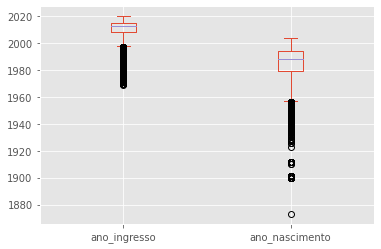

In [12]:
data[['ano_ingresso','ano_nascimento']].plot(kind='box')
plt.show()

Apesar de muitos dados ainda estarem longe da mediana e, por isso, aparecem como _outliers_ no _plot_, os dados são consistentes. Isso se deve ao fato de que a quantidade de matrículas na UFRN aumentou consideravelmente nas últimas duas décadas, gerando uma concentração grande de entradas em um período específico.

> Esse tipo de constatação só é possível a partir do conhecimento do problema. Note a importância de não ficar restrito a uma análise numérica.

Vamos agora analisar mais individualmente os valores que cada uma das características pode assumir.

In [13]:
for col in data:
    print(col, ':', data[col].unique())

id_discente : ['0e356f33d9f25c70bd7b98ef1bd1ecd4' 'e2f244371122aea4140427ada6f391b4'
 'a658dd5e0ad7a54924d4d24a2542fd7f' ... 'a66e6c2b20852f66ebbd7cecaf1b704b'
 '9a4bd119efe88b3eeb1cf2bf4a5e2612' 'c2fda3d390e8c5a1aac9bc685e1193de']
sexo : ['M' 'F' 'false']
ano_nascimento : [1943. 1944. 1938. 1956. 1953. 1965. 1957. 1948. 1949. 1952. 1941. 1947.
 1950. 1955. 1951. 1935. 1942. 1954. 1958. 1946. 1945. 1939. 1959. 1940.
 1901. 1964. 1968. 1960. 1961. 1962. 1937. 1931. 1928. 1963. 1936. 1927.
 1972. 1983. 2001. 1971. 1970. 1969. 1934. 1900. 1967. 1976. 1966. 1981.
 1975. 1982. 1973. 1932. 1926. 1991. 1933. 1978. 1979. 1997. 1974. 1929.
 1977. 1910. 1980. 1984. 1995. 1986. 1985. 1988. 1989. 1987. 1996. 1992.
 2002. 1998. 1990. 1993. 2000. 1994. 2004. 2003. 1999. 1912. 1873. 1923.]
raca : ['Não Informado' 'Branco' 'Pardo' 'Negro' 'Indígeno'
 'Amarelo (de origem oriental)' 'Remanescente de quilombo']
estado_origem : ['Rio Grande do Norte' 'Paraíba' 'Maranhão' 'Rio de Janeiro' 'Ceará'
 'Piauí' 

A maioria dos dados _parece_ que está de acordo com o esperado. Mas, podemos ver que o atributo `sexo` possui três valores: M, F, false.

Os valores _false_ podem indicar que não foi informado um valor para esse campo. Se esse fosse o caso, o mais indicado seria adotar uma abordagem como para o campo `raca`, onde existe um valor `Não informado`. Então, para fins deste exemplo, vamos remover as entradas com esse valor.

In [14]:
data = data[data['sexo'] != 'false']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319957 entries, 0 to 401708
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_discente       319957 non-null  object 
 1   sexo              319957 non-null  object 
 2   ano_nascimento    319957 non-null  float64
 3   raca              319957 non-null  object 
 4   estado_origem     319957 non-null  object 
 5   cidade_origem     319957 non-null  object 
 6   estado            319957 non-null  object 
 7   municipio         319957 non-null  object 
 8   bairro            319957 non-null  object 
 9   nivel_ensino      319957 non-null  object 
 10  forma_ingresso    319957 non-null  object 
 11  ano_ingresso      319957 non-null  int64  
 12  periodo_ingresso  319957 non-null  float64
 13  cotista           319957 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 36.6+ MB


## Refinamento dos Dados

A partir desse momento, podemos iniciar um afunilamento dos dados para atender a análise que se deseja. Vamos, então, filtrar os dados para contemplar somente os alunos que são do Rio Grande do Norte.

In [15]:
data = data[data['estado_origem'] == 'Rio Grande do Norte']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257291 entries, 0 to 401707
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_discente       257291 non-null  object 
 1   sexo              257291 non-null  object 
 2   ano_nascimento    257291 non-null  float64
 3   raca              257291 non-null  object 
 4   estado_origem     257291 non-null  object 
 5   cidade_origem     257291 non-null  object 
 6   estado            257291 non-null  object 
 7   municipio         257291 non-null  object 
 8   bairro            257291 non-null  object 
 9   nivel_ensino      257291 non-null  object 
 10  forma_ingresso    257291 non-null  object 
 11  ano_ingresso      257291 non-null  int64  
 12  periodo_ingresso  257291 non-null  float64
 13  cotista           257291 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 29.4+ MB


Refinando mais ainda, podemos analisar os dados na perspectiva somente dos alunos que são da cidade de Natal.

In [16]:
data = data[data['cidade_origem'] == 'NATAL']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171009 entries, 0 to 401707
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_discente       171009 non-null  object 
 1   sexo              171009 non-null  object 
 2   ano_nascimento    171009 non-null  float64
 3   raca              171009 non-null  object 
 4   estado_origem     171009 non-null  object 
 5   cidade_origem     171009 non-null  object 
 6   estado            171009 non-null  object 
 7   municipio         171009 non-null  object 
 8   bairro            171009 non-null  object 
 9   nivel_ensino      171009 non-null  object 
 10  forma_ingresso    171009 non-null  object 
 11  ano_ingresso      171009 non-null  int64  
 12  periodo_ingresso  171009 non-null  float64
 13  cotista           171009 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 19.6+ MB


Como existem muitas formas de entrada na universidade, vamos nos deter as duas principais: 

- vestibular: antes da criação do SISu
- SISu: após a criação do sistema e a adoção do ENEM como forma de avaliação.

In [17]:
data = data[(data['forma_ingresso'] == 'VESTIBULAR') | (data['forma_ingresso'] == 'SiSU')]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108783 entries, 0 to 401172
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_discente       108783 non-null  object 
 1   sexo              108783 non-null  object 
 2   ano_nascimento    108783 non-null  float64
 3   raca              108783 non-null  object 
 4   estado_origem     108783 non-null  object 
 5   cidade_origem     108783 non-null  object 
 6   estado            108783 non-null  object 
 7   municipio         108783 non-null  object 
 8   bairro            108783 non-null  object 
 9   nivel_ensino      108783 non-null  object 
 10  forma_ingresso    108783 non-null  object 
 11  ano_ingresso      108783 non-null  int64  
 12  periodo_ingresso  108783 non-null  float64
 13  cotista           108783 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 12.4+ MB


Por fim, vamos escolher um nível de ensino para analisar os dados.

In [18]:
data = data[data['nivel_ensino'] == 'GRADUAÇÃO']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107833 entries, 0 to 401172
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_discente       107833 non-null  object 
 1   sexo              107833 non-null  object 
 2   ano_nascimento    107833 non-null  float64
 3   raca              107833 non-null  object 
 4   estado_origem     107833 non-null  object 
 5   cidade_origem     107833 non-null  object 
 6   estado            107833 non-null  object 
 7   municipio         107833 non-null  object 
 8   bairro            107833 non-null  object 
 9   nivel_ensino      107833 non-null  object 
 10  forma_ingresso    107833 non-null  object 
 11  ano_ingresso      107833 non-null  int64  
 12  periodo_ingresso  107833 non-null  float64
 13  cotista           107833 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 12.3+ MB


Se olharmos para uma amostra dos dados, temos:

In [19]:
data.head()

,id_discente,sexo,ano_nascimento,raca,estado_origem,cidade_origem,estado,municipio,bairro,nivel_ensino,forma_ingresso,ano_ingresso,periodo_ingresso,cotista
0,0e356f33d9f25c70bd7b98ef1bd1ecd4,M,1943.0,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,NEOPOLIS,GRADUAÇÃO,VESTIBULAR,1969,1.0,f
4,e2f244371122aea4140427ada6f391b4,M,1944.0,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,ALECRIM,GRADUAÇÃO,VESTIBULAR,1970,1.0,f
21,ee30e378d0b1553ecf457a67bb063dc9,F,1943.0,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,PAJUCARA I,GRADUAÇÃO,VESTIBULAR,1970,1.0,f
200,f38bf57cac7a995de7dad0d6ae6e6bdf,F,1953.0,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,LAGOA NOVA,GRADUAÇÃO,VESTIBULAR,1973,1.0,f
206,50796038abc5cd5db5c02d6fb3bbe993,M,1957.0,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,MORRO BRANCO,GRADUAÇÃO,VESTIBULAR,1973,1.0,f


Note que, como alguns atributos possuem o mesmo valor para todas as entradas, não faz sentido deixá-los, já que não acrescentam qualquer tipo de valor para análise.

Além disso, alguns atributos possuem valores que são irrelevantes, como o `id_discente`. Vamos remover todos eles.

In [20]:
del data['id_discente']
del data['estado_origem']
del data['cidade_origem']
del data['estado']
del data['municipio']
del data['forma_ingresso']
del data['nivel_ensino']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107833 entries, 0 to 401172
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sexo              107833 non-null  object 
 1   ano_nascimento    107833 non-null  float64
 2   raca              107833 non-null  object 
 3   bairro            107833 non-null  object 
 4   ano_ingresso      107833 non-null  int64  
 5   periodo_ingresso  107833 non-null  float64
 6   cotista           107833 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 6.6+ MB


Ao fim desse processo, saímos de 401711 entradas no conjunto de dados para 107833. Vamos plotar novamente aqueles dois atributos para visualizar a mudança.

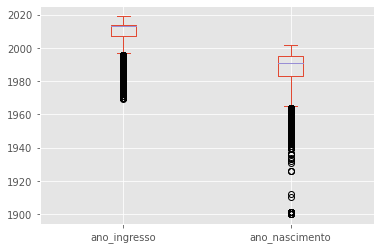

In [21]:
data[['ano_ingresso','ano_nascimento']].plot(kind='box')
plt.show()

O comportamento dos dados se manteve semelhante, o que indica que existe uma distribição homogênea dos valores para os atributos removidos.

Se quisermos entender um pouco melhor como está a concentração dos dados dentro dos valores dos atributos, podemos escolher um outro tipo de gráfico. Vamos comparar o _boxplot_ com o _violinplot_, onde é possível notar a frequência com que os dados estão distribuídos dentro do intervalor total.

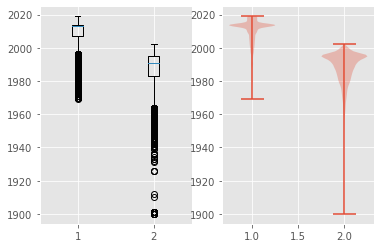

In [22]:
plt.subplot(1,2,1)
plt.boxplot([data['ano_ingresso'], data['ano_nascimento']])

plt.subplot(1,2,2)
plt.violinplot([data['ano_ingresso'].values,data['ano_nascimento'].values])

plt.show()

Claramente, existe uma concentração forte do ano de ingresso nas duas primeiras décadas dos anos 2000.

Vamos detalhar um pouco mais isso:

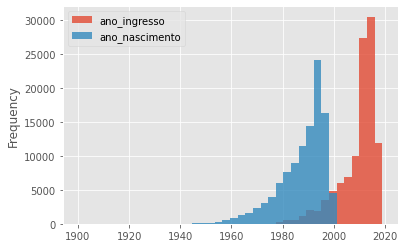

In [23]:
data[['ano_ingresso','ano_nascimento']].plot(kind='hist', bins=40, alpha=0.8)
plt.show()

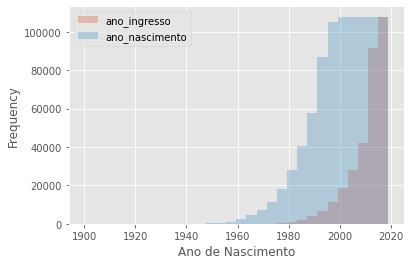

In [24]:
data[['ano_ingresso','ano_nascimento']].plot(kind='hist', bins=30, range=(1900,2019), cumulative=True, alpha=0.3)
plt.xlabel('Ano de Nascimento')
plt.show()

A concetração dos dados para o atributo `ano_nascimento` é uma consequência da concentração do outro atributo `ano_ingresso`. Isso acontece por que existe uma faixa de idade mais provável que a pessoa entre na universidade. 

Vamos visualizar qual a relação entre esses dois atribuitos com um _scatter plot_.

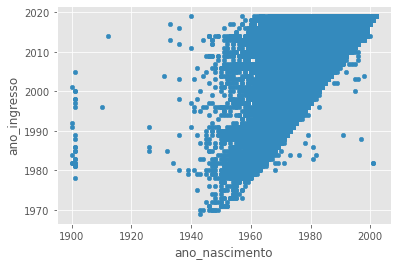

In [25]:
data.plot.scatter(x='ano_nascimento',y='ano_ingresso')
plt.show()

A correlação existente entre esses dois atributos é notável. Existe um comportamento linear geral entre os dois indicando que a idade de entrada na univerisidade, de uma maneira geral, está concentrada em uma faixa específica.

O gráfico ajuda a encontrar inclusive _outliers_ em valores a direita e a esquerda da reta $ax + b$. Quando os valores estão a direita, significa que as pessoas ingressaram na universidade com idade inferir ao padrão, enquanto que à esquerda, indicam que ingressaram com idade superior ao padrão.

Note que estar somente um pouco afastado dessa reta não deve indicar um erro (somente uma pessoa que ingressou com idade _pouco convencional_), mas se afastar muito é um _forte_ indício de ruído nos dados.

Para analisar melhor esse comportamento, vamos _criar_ um novo atributo `idade` para analisar.

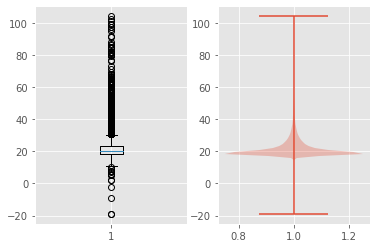

In [26]:
idade = data['ano_ingresso'] - data['ano_nascimento']

plt.subplot(1,2,1)
plt.boxplot(idade)

plt.subplot(1,2,2)
plt.violinplot(idade)

plt.show()

É notória a quantidade de pessoas que ingressam na universidade por volta dos 20 anos. Essa quantidade vai diminuindo exponencialmente a medida que nos afastamentos da mediana.

A partir desse gráfico, também é possível notar valores inconsistentes. Por exemplo, existem valores negativos e próximos a zero. Também existem valores acima dos 100 anos, que apesar de improváveis, são ainda possíveis.

Podemos aplicar uma nova limpeza nos dados para sanar esses problemas.

## Outras análises

Podemos continuar extraindo informações a partir dos dados. A seguir são mostrados alguns exemplos de alguns dessas possibilidades.

### Ingresso por raça declarada

In [27]:
data['raca'].unique()

array(['Não Informado', 'Branco', 'Pardo', 'Negro',
       'Amarelo (de origem oriental)', 'Indígeno',
       'Remanescente de quilombo'], dtype=object)

Pardo                           44338
Branco                          30063
Não Informado                   28827
Negro                            4317
Indígeno                          174
Amarelo (de origem oriental)      100
Remanescente de quilombo           14
Name: raca, dtype: int64


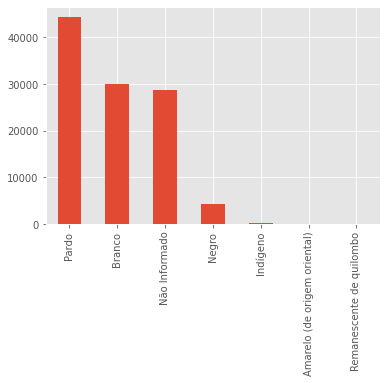

In [28]:
print(data['raca'].value_counts())
data['raca'].value_counts().plot.bar()
plt.show()

### Ingresso por bairro de Natal

In [29]:
counts = data['bairro'].value_counts()
mask = data['bairro'].isin(counts[counts < 1000].index) 
data['bairro'][mask] = 'OUTROS'
data['bairro'].value_counts()

OUTROS                           40695
LAGOA NOVA                        6478
NOVA PARNAMIRIM                   6088
CENTRO                            5401
POTENGI                           4396
CAPIM MACIO                       4361
PITIMBU                           3934
TIROL                             3662
CANDELÁRIA                        3379
NEÓPOLIS                          3045
ALECRIM                           2925
PONTA NEGRA                       2855
PAJUÇARA                          2203
Centro                            2136
NOSSA SENHORA DA APRESENTAÇÃO     2046
LAGOA AZUL                        1558
EMAÚS                             1553
CIDADE DA ESPERANÇA               1474
BARRO VERMELHO                    1406
PLANALTO                          1352
FELIPE CAMARÃO                    1269
NOVA DESCOBERTA                   1253
CANDELARIA                        1155
QUINTAS                           1119
IGAPÓ                             1048
NEOPOLIS                 

## Transformação de valores

Somente para demonstrar uma forma de transformar os valores, vamos converter os atributos do tipo _categórico_ para numérico usando a codificação _dummy_.

In [30]:
data = pd.get_dummies(data, columns=['sexo', 'raca', 'bairro', 'cotista'])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107833 entries, 0 to 401172
Data columns (total 40 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ano_nascimento                        107833 non-null  float64
 1   ano_ingresso                          107833 non-null  int64  
 2   periodo_ingresso                      107833 non-null  float64
 3   sexo_F                                107833 non-null  uint8  
 4   sexo_M                                107833 non-null  uint8  
 5   raca_Amarelo (de origem oriental)     107833 non-null  uint8  
 6   raca_Branco                           107833 non-null  uint8  
 7   raca_Indígeno                         107833 non-null  uint8  
 8   raca_Negro                            107833 non-null  uint8  
 9   raca_Não Informado                    107833 non-null  uint8  
 10  raca_Pardo                            107833 non-null  uint8  
 11  

Note que, para cada possível valor dos atributos categóricos, foi criado um novo atributo.

Ainda é possível remover alguns atributos que estão longe do intervalo principal dos dados. Para isso, vamos remover as entradas cujos valores para o atributo `ano_nascimento` estão a mais de três desvios padrões da média.

In [33]:
mean = data['ano_nascimento'].mean() 
std = data['ano_nascimento'].std()
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off
data = data[(data['ano_nascimento'] < upper) & (data['ano_nascimento'] > lower)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106644 entries, 1957 to 401172
Data columns (total 40 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ano_nascimento                        106644 non-null  float64
 1   ano_ingresso                          106644 non-null  int64  
 2   periodo_ingresso                      106644 non-null  float64
 3   sexo_F                                106644 non-null  uint8  
 4   sexo_M                                106644 non-null  uint8  
 5   raca_Amarelo (de origem oriental)     106644 non-null  uint8  
 6   raca_Branco                           106644 non-null  uint8  
 7   raca_Indígeno                         106644 non-null  uint8  
 8   raca_Negro                            106644 non-null  uint8  
 9   raca_Não Informado                    106644 non-null  uint8  
 10  raca_Pardo                            106644 non-null  uint8  
 1

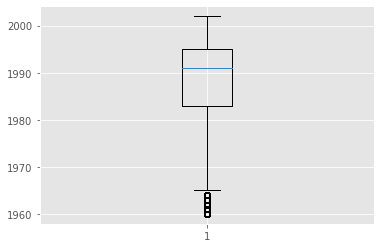

In [35]:
plt.boxplot(data['ano_nascimento'])
plt.show()